<a href="https://colab.research.google.com/github/talhaanwarch/Schizophrenia14/blob/master/schizo14final_gaussian_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Packages

In this approach data is segmented and feature are calculated for each segment. Then these features are averaged

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [1]:
!pip install wfdb
!pip install mne
# !pip install nitime
# !pip install nolds

     |████████████████████████████████| 122kB 7.1MB/s 
     |████████████████████████████████| 6.8MB 19.6MB/s 
     |████████████████████████████████| 163kB 64.5MB/s 
  Created wheel for wfdb: filename=wfdb-3.1.1-cp36-none-any.whl size=117828 sha256=9d3e0a28840a7c47b7ec4cf9bd6bc09bf09004cdca4bf1cd4998dd7d4cf217e5
  Stored in directory: /root/.cache/pip/wheels/bc/d0/c1/90538d266ccba2d1076fbc9970192c7ea1a09c99df3e65c69b
Successfully built wfdb


In [2]:
!pip install git+https://github.com/forrestbao/pyeeg.git
!pip install git+https://github.com/raphaelvallat/entropy.git

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-fo74s8dv
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-fo74s8dv
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28122 sha256=fd91ad97393c7bebdd31623527455ba7f9002fc0f14536edd14bd049a3413f46
  Stored in directory: /tmp/pip-ephem-wheel-cache-hganhvo6/wheels/2d/3f/ad/106d4fc80b61d1ea1fc18e76e7439fd98aa043d83d58eae741
Successfully built pyeeg
  Cloning https://github.com/raphaelvallat/entropy.git to /tmp/pip-req-build-t5ndbv_d
  Running command git clone -q https://github.com/raphaelvallat/entropy.git /tmp/pip-req-build-t5ndbv_d
  Created wheel for entropy: filename=entropy-0.1.2-cp36-none-any.whl size=15611 sha256=78c5349913188c7858ecdee66d854df835831ccfa88c760526c3dbc28f8dbad0
  Stored in directory: /tmp/pip-ephem-wheel-cache-5yarmfrz/wheels/60/ed/d3/b715e38438f1f39edb1383aea79c578073953b25fa576fc71e
Successfully built entropy


# Download data

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
cd /content/drive/My Drive/dataset/SchizoPhrenia 14

/content/drive/My Drive/dataset/SchizoPhrenia 14


# Read data

In [5]:
import glob
import os
import mne
import re
import numpy as np
from sklearn.preprocessing import MaxAbsScaler

In [6]:
from scipy import signal
nyq = 0.5 * 250
l=0.2
low = l / nyq
high = 45 / nyq
b, a = signal.butter(4, [low,high], 'band')

In [7]:
import numpy as np 


In [103]:
HC_files=glob.glob('HC/*.edf')    
HC=[]
for i in HC_files:
    data=mne.io.read_raw_edf(i,preload=True)
    #data.set_eeg_reference('average')
    data=data.get_data()
    
    
    mu, sigma = np.mean(data), np.std(data)
    noise = np.random.normal(mu, sigma, data.shape)*0.2
    data=data+noise
    data=signal.filtfilt(b, a, data)
   # data=mne.filter.filter_data(data, sfreq=250, l_freq=0.1, h_freq=45)
    #scaler=StandardScaler()        
    #data=scaler.fit_transform(data.T)     
    #data=maxabs_scale(data.T)
    HC.append(data.T)
    

Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/HC/h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/HC/h02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/HC/h03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/HC/h04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/S

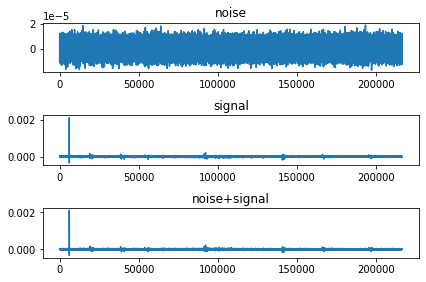

In [104]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(3)
ax[0].plot(noise[0])
ax[0].set_title('noise')
ax[1].plot(data[0])
ax[1].set_title('signal')
ax[2].set_title('noise+signal')
ax[2].plot(data[0]+noise[0])
fig.tight_layout(pad=1.0)


In [105]:
SZ_files=glob.glob('SZ/*.edf')
SZ=[]
for i in SZ_files:
    data=mne.io.read_raw_edf(i,preload=True)
    #data.set_eeg_reference('average')
    data=data.get_data()
    mu, sigma = np.mean(data), np.std(data)
    noise = np.random.normal(mu, sigma, data.shape)*0.2
    data=data+noise
    data=signal.filtfilt(b, a, data)
    #data=mne.filter.filter_data(data, sfreq=250, l_freq=0.1, h_freq=45)
    #data=maxabs_scale(data.T)
    SZ.append(data.T)

Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/SZ/s01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 211249  =      0.000 ...   844.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/SZ/s02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 286249  =      0.000 ...  1144.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/SZ/s03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 240999  =      0.000 ...   963.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/SZ/s04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 301249  =      0.000 ...  1204.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/S

In [106]:
len(HC),len(SZ)

(14, 14)

In [107]:
import numpy as np
X1=np.concatenate(HC)
X2=np.concatenate(SZ)
X=np.concatenate((X1,X2))
X.shape

(7215750, 19)

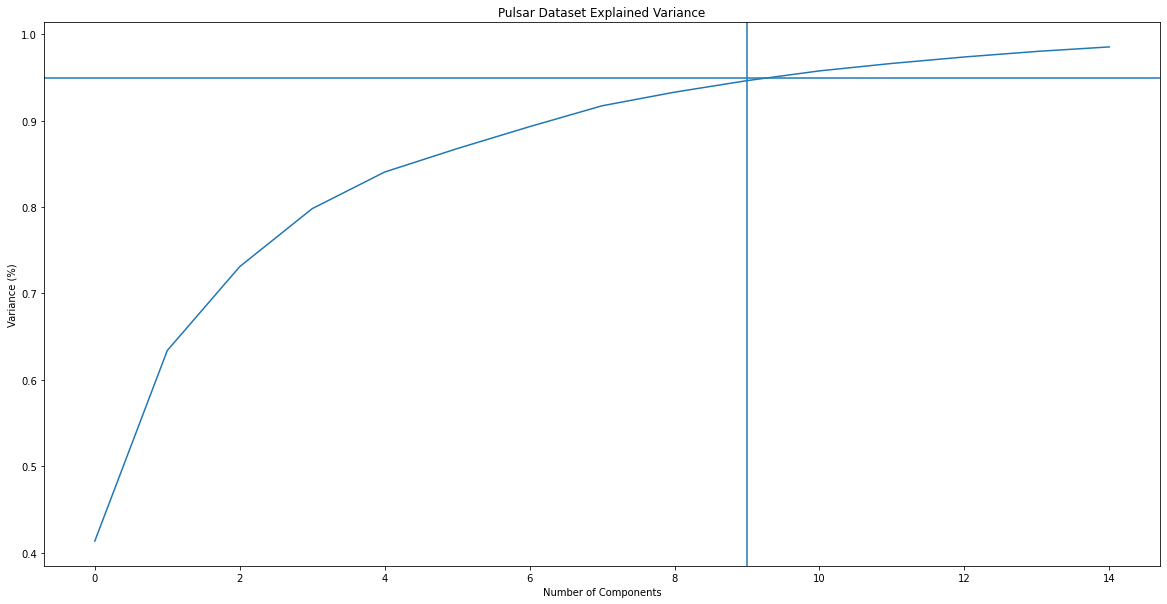

In [108]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
plt.figure(figsize=(20,10))
pca = PCA().fit(X)
plt.axhline(0.95)
plt.axvline(9)
#Plotting the Cumulative Summation of the Explained Variance
plt.plot(np.cumsum(pca.explained_variance_ratio_)[0:15])
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [109]:
channels=['Fp2', 'F8', 'T4', 'T6', 'O2', 'Fp1', 'F7', 'T3', 'T5', 'O1', 'F4', 'C4', 'P4', 'F3', 'C3', 'P3', 'Fz', 'Cz', 'Pz']

In [110]:
df1 = pd.DataFrame.from_records(X)
df1.shape

(7215750, 19)

In [111]:
df1.columns=channels

In [112]:
df1.head()

,Fp2,F8,T4,T6,O2,Fp1,F7,T3,T5,O1,F4,C4,P4,F3,C3,P3,Fz,Cz,Pz
0,-0.000009,-0.000002,5.508326e-07,3.387149e-06,0.000008,-0.000002,-9.824414e-07,3.216623e-07,-0.000006,-4.232370e-06,1.020600e-06,7.372370e-07,0.000004,2.458923e-07,4.039001e-07,-1.068562e-06,2.218972e-07,0.000003,2.702733e-06
1,-0.000011,-0.000002,-1.488227e-06,2.481393e-06,0.000009,-0.000001,-2.547732e-06,2.238318e-07,-0.000003,-1.823699e-06,1.261289e-06,2.587038e-06,0.000003,4.824544e-07,-1.726662e-06,-6.889586e-07,-1.753970e-06,0.000003,4.080135e-07
2,-0.000012,-0.000003,-2.548152e-06,1.658558e-06,0.000010,-0.000001,-3.001086e-06,3.491559e-07,-0.000002,2.311267e-09,1.067610e-06,4.094281e-06,0.000003,8.505954e-07,-3.021770e-06,-4.197274e-07,-2.887287e-06,0.000003,-2.628368e-07
3,-0.000013,-0.000003,-2.732730e-06,1.024294e-06,0.000010,-0.000001,-2.147578e-06,9.608561e-07,-0.000002,7.920555e-07,5.326181e-07,4.796875e-06,0.000002,1.437726e-06,-3.211898e-06,-2.917463e-07,-3.150106e-06,0.000002,8.966000e-07
4,-0.000012,-0.000004,-2.860622e-06,6.767475e-07,0.000010,-0.000002,-7.052048e-07,2.070195e-06,-0.000002,4.427235e-07,1.680071e-07,4.294627e-06,0.000002,2.181075e-06,-2.723996e-06,-2.648519e-07,-3.140877e-06,0.000002,2.706547e-06


In [113]:
ch=10

In [114]:
X_1=df1.var()
idx=X_1.sort_values()[-ch::].index

print(idx)
ch=len(idx)

Index(['T6', 'F8', 'Fz', 'F7', 'P4', 'Pz', 'Fp1', 'O2', 'Fp2', 'T5'], dtype='object')


In [115]:
indx=[]
for i in idx:
  indx.append(channels.index(i))
indx=np.array(indx)  

In [116]:
indx

array([ 3,  1, 16,  6, 12, 18,  5,  4,  0,  8])

In [117]:
def reshape(data):   
    shape=data.ravel().shape[0]
    s=shape%19000
    if s!=0:
        d=data.ravel()[s//2:-s//2].reshape(-1,1000,19)[:,:,indx]
        #return np.swapaxes(d,1,2)   
        return d
    else: 
        d1=data.reshape(-1,1000,19)[:,:,indx]
        #return np.swapaxes(d1,1,2)   
        return d1
        

In [118]:
HC_reshaped=[]
for i in HC:
    HC_reshaped.append(reshape(i))
    
    
SZ_reshaped=[]
for i in SZ:
    SZ_reshaped.append(reshape(i))   

In [119]:
HC_reshaped[0].shape

(231, 1000, 10)

# Libraries

In [120]:
from scipy import stats
import pyeeg
from entropy import *
import pywt
#from nitime import algorithms as alg
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#import nolds
np.warnings.filterwarnings('ignore')

# Main Features

In [121]:

from scipy import stats
import pyeeg
from entropy import *
def mean(data):
    return np.mean(data,axis=0)
    
def std(data):
    return np.std(data,axis=0)

def ptp(data):
    return np.ptp(data,axis=0)

def var(data):
        return np.var(data,axis=0)

def minim(data):
      return np.min(data,axis=0)


def maxim(data):
      return np.max(data,axis=0)

def argminim(data):
      return np.argmin(data,axis=0)


def argmaxim(data):
      return np.argmax(data,axis=0)

def mean_square(data):
      return np.mean(data**2,axis=0)

def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2,axis=0))  

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=0)),axis=0)


def skewness(data):
    return stats.skew(data,axis=0)

def kurtosis(data):
    return stats.kurtosis(data,axis=0)

def zero_crossing(data):
    return np.argmax(np.diff(np.sign(data),axis=0),axis=0)

def app_epy(data):
    result=[]
    for i in data.T:
        result.append(app_entropy(i, order=2, metric='chebyshev'))
    return np.array(result)

def perm_epy(data):
    result=[]
    for i in data.T:
        result.append(perm_entropy(i, order=3, normalize=True))
    return np.array(result)

def svd_epy(data):
    result=[]
    for i in data.T:
        result.append(svd_entropy(i, order=3, delay=1, normalize=True))
    return np.array(result)

def spectral_epy(data):
    result=[]
    for i in data.T:
        result.append(spectral_entropy(i, 100, method='welch', normalize=True))
    return np.array(result)

def sample_epy(data):
    result=[]
    for i in data.T:
        result.append(sample_entropy(i, order=2, metric='chebyshev'))
    return np.array(result)


def katz(data):
    result=[]
    for i in data.T:
        result.append(katz_fd(i))
    return np.array(result)

def higuchi(data):
    result=[]
    for i in data.T:
        result.append(higuchi_fd(i))
    return np.array(result)


def petrosian(data):
    result=[]
    for i in data.T:
        result.append(petrosian_fd(i))
    return np.array(result)

def autogressiveModelParameters(data):
    feature = []
    for i in data.T:
        coeff, sig = alg.AR_est_YW(i, order=5)
        feature.append(np.mean(coeff))
    return np.array(feature)

def teager(x):
    for i in range(len(x)-1):
        return x[i]**2 - (x[i-1]*x[i+1])


def lziv_complex(data):
    result=[]
    for i in data.T:
        result.append(lziv_complexity(i))
    return np.array(result)

        
def hjorth_mobility(data):
    return np.divide(np.std(np.diff(data,axis=0),axis=0),np.std(data,axis=0))

def hjorth_complexity(data):
    return np.divide(hjorth_mobility(np.diff(data,axis=0)),  hjorth_mobility(data))      




def concatenate_features(data):
    return np.concatenate((mean(data),std(data),ptp(data),var(data),minim(data),maxim(data),argminim(data),argmaxim(data),
                          mean_square(data),rms(data),abs_diffs_signal(data),
                          skewness(data),kurtosis(data),zero_crossing(data),
                          app_epy(data),perm_epy(data),svd_epy(data),spectral_epy(data),sample_epy(data),
                          katz(data),higuchi(data),petrosian(data),teager(data),lziv_complex(data),
                          hjorth_mobility(data),hjorth_complexity(data)),axis=0)

In [122]:
features1=[]
for f in HC_reshaped:
    feature=[]
    for i in f:
        feature.append(concatenate_features(i))
    features1.append(np.mean(np.array(feature),axis=0))

In [123]:
features2=[]
for f in SZ_reshaped:
    feature=[]
    for i in f:
        feature.append(concatenate_features(i))
    features2.append(np.mean(np.array(feature),axis=0))

In [124]:
x1=np.array(features1)        
x2=np.array(features2)      

X=np.concatenate((x1,x2),axis=0)

y=np.concatenate(((np.zeros(x1.shape[0])),(np.ones(x2.shape[0]))))
X.shape,y.shape

((28, 260), (28,))

In [125]:
feature=X.copy()
label=y.copy()
from sklearn.preprocessing import scale,maxabs_scale
feature=scale(feature)

In [126]:

from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y):
    Cs = [ 0.1, 1, 10,15,20,25,30,40,50,60,70,100,120]
    gammas = [0.0001,0.0005,0.001,0.005,0.008, 0.01, 0.1,0.3,0.5, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_score_


svc_param_selection(feature,label)

0.8166666666666667

In [127]:
feature_list=['mean','std','ptp','var','minim','maxim','argmin','argmax','mean_square','rms','abs_diffs_signal','skewness','kurtosis','zero_crossing',
'app_epy','perm_epy','svd_epy','spectral_epy','sample_epy','katz','higuchi','petrosian','teager','lziv_complex',
'hjorth_mobility','hjorth_complexity']

In [128]:
feature_selected=[]
feat_non_sorted=[]
score_non_sorted=[]
for i ,j in zip(range(0,feature.shape[1],ch),feature_list):
  acc=svc_param_selection(feature[:,i:i+ch],label)
  print(j," : ",acc)
  feat_non_sorted.append(j)
  score_non_sorted.append(acc)

mean  :  0.6833333333333333
std  :  0.8833333333333332
ptp  :  0.75
var  :  0.5833333333333333
minim  :  0.7833333333333333
maxim  :  0.7833333333333333
argmin  :  0.6
argmax  :  0.5833333333333333
mean_square  :  0.5833333333333333
rms  :  0.8833333333333332
abs_diffs_signal  :  0.75
skewness  :  0.5
kurtosis  :  0.7
zero_crossing  :  0.7
app_epy  :  0.8
perm_epy  :  0.8333333333333333
svd_epy  :  0.8
spectral_epy  :  0.8166666666666667
sample_epy  :  0.8333333333333333
katz  :  0.85
higuchi  :  0.8333333333333333
petrosian  :  0.8333333333333333
teager  :  0.7833333333333333
lziv_complex  :  0.36666666666666664
hjorth_mobility  :  0.7833333333333333
hjorth_complexity  :  0.7833333333333333


In [129]:
print(feat_non_sorted)
print(score_non_sorted)

['mean', 'std', 'ptp', 'var', 'minim', 'maxim', 'argmin', 'argmax', 'mean_square', 'rms', 'abs_diffs_signal', 'skewness', 'kurtosis', 'zero_crossing', 'app_epy', 'perm_epy', 'svd_epy', 'spectral_epy', 'sample_epy', 'katz', 'higuchi', 'petrosian', 'teager', 'lziv_complex', 'hjorth_mobility', 'hjorth_complexity']
[0.6833333333333333, 0.8833333333333332, 0.75, 0.5833333333333333, 0.7833333333333333, 0.7833333333333333, 0.6, 0.5833333333333333, 0.5833333333333333, 0.8833333333333332, 0.75, 0.5, 0.7, 0.7, 0.8, 0.8333333333333333, 0.8, 0.8166666666666667, 0.8333333333333333, 0.85, 0.8333333333333333, 0.8333333333333333, 0.7833333333333333, 0.36666666666666664, 0.7833333333333333, 0.7833333333333333]


In [130]:
score,feat  = zip(*sorted(zip(score_non_sorted, feat_non_sorted),reverse=True))


In [131]:
print(feat)
print(score)

('std', 'rms', 'katz', 'sample_epy', 'petrosian', 'perm_epy', 'higuchi', 'spectral_epy', 'svd_epy', 'app_epy', 'teager', 'minim', 'maxim', 'hjorth_mobility', 'hjorth_complexity', 'ptp', 'abs_diffs_signal', 'zero_crossing', 'kurtosis', 'mean', 'argmin', 'var', 'mean_square', 'argmax', 'skewness', 'lziv_complex')
(0.8833333333333332, 0.8833333333333332, 0.85, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8166666666666667, 0.8, 0.8, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.75, 0.75, 0.7, 0.7, 0.6833333333333333, 0.6, 0.5833333333333333, 0.5833333333333333, 0.5833333333333333, 0.5, 0.36666666666666664)


In [132]:
def del_item(a, b):
     return [x for x in a if x not in b]



#skf = StratifiedKFold(n_splits=10, random_state=2020, shuffle=False)
acc=0
deleted_item=[]
for i in range(1,20):
  feature_selected=list(feat[:i])
  # feature_selected=del_item(feature_selected,deleted_item)

  X_good=[]
  for key,val in zip(feature_list,range(0,feature.shape[1],ch)):
      for fe in feature_selected:
          if key==fe:     
              #print('key',key,'value',val,":",val+ch) 
              X_good.append(feature[:,val:val+ch])
  good_feature=np.concatenate((X_good),axis=1)
  #good_feature=np.concatenate((good_feature,non_eeg),1)


  acc_new=svc_param_selection(good_feature,label)
  print(i,' : ', acc_new)

  # print(acc_new, good_feature.shape)
  # if acc_new<(acc-0.01):
  #   deleted_item.append(feature_selected.pop())
  #   print('del item',deleted_item)
  # else:
  #   acc=acc_new


1  :  0.8833333333333332
2  :  0.8833333333333332
3  :  0.8166666666666667
4  :  0.8166666666666667
5  :  0.7833333333333333
6  :  0.7833333333333333
7  :  0.7833333333333333
8  :  0.8666666666666666
9  :  0.8333333333333333
10  :  0.8333333333333333
11  :  0.8166666666666667
12  :  0.8166666666666667
13  :  0.8166666666666667
14  :  0.8166666666666667
15  :  0.8166666666666667
16  :  0.7833333333333333
17  :  0.8166666666666667
18  :  0.7833333333333333
19  :  0.75


In [133]:

feature_selected=feat[:8]
X_good=[]
for key,val in zip(feature_list,range(0,feature.shape[1],ch)):
    for fe in feature_selected:
        if key==fe:     
            print('key',key,'value',val,":",val+ch) 
            X_good.append(feature[:,val:val+ch])

key std value 10 : 20
key rms value 90 : 100
key perm_epy value 150 : 160
key spectral_epy value 170 : 180
key sample_epy value 180 : 190
key katz value 190 : 200
key higuchi value 200 : 210
key petrosian value 210 : 220


In [134]:
good_feature=np.concatenate((X_good),axis=1)
good_feature.shape

(28, 80)

In [135]:
def svc_param_selection(X, y, nfolds):
    Cs = [ 0.1, 1, 10,15,20,25,30,40,50,60,70,80,100,120]
    gammas = [0.0001,0.0005,0.001,0.005,0.008, 0.01, 0.1,0.3,0.5, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    print(grid_search.best_score_)
    return grid_search.best_params_


svc_param_selection(good_feature,label,10)

0.8666666666666666


{'C': 1, 'gamma': 0.1}

In [138]:
clf = SVC(kernel="rbf", C=1,gamma=0.1, probability=True)
acc = cross_val_score(clf,good_feature,label,cv=10)
precision = cross_val_score(clf,good_feature,label,cv=10,scoring='precision')
recall = cross_val_score(clf,good_feature,label,cv=10,scoring='recall')
f1 = cross_val_score(clf,good_feature,label,cv=10,scoring='f1')

print('average accuracy : ',np.array(acc).mean(),np.std(np.array(acc)))
print('average precision : ',np.array(precision).mean(),np.std(np.array(precision)))
print('average recall : ',np.array(recall).mean(),np.std(np.array(recall)))
print('average f1 score : ',np.array(f1).mean(),np.std(np.array(f1)))

average accuracy :  0.8666666666666666 0.16329931618554522
average precision :  0.8833333333333332 0.18333333333333335
average recall :  0.95 0.15
average f1 score :  0.8933333333333333 0.13727506854649335


In [ ]:
def knn_param_selection(X, y, nfolds):
    n_neighbors  = [ 3,4,5,6,7,8,9]
    weights  = ['uniform','distance']
    metric=['minkowski','manhattan','euclidean']
    param_grid = {'n_neighbors': n_neighbors, 'weights' : weights,'metric':metric}
    grid_search =GridSearchCV( KNeighborsClassifier(), param_grid, cv=nfolds,n_jobs=-1)
    grid_search.fit(X, y)
    print(grid_search.best_score_)
    return grid_search.best_params_


knn_param_selection(good_feature,label,10)

0.6833333333333333


{'metric': 'minkowski', 'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
clf = KNeighborsClassifier(metric= 'minkowski', n_neighbors=4, weights= 'distance')
acc = cross_val_score(clf,good_feature,label,cv=10)
precision = cross_val_score(clf,good_feature,label,cv=10,scoring='precision')
recall = cross_val_score(clf,good_feature,label,cv=10,scoring='recall')
f1 = cross_val_score(clf,good_feature,label,cv=10,scoring='f1')

print('average accuracy : ',np.array(acc).mean(),np.std(np.array(acc)))
print('average precision : ',np.array(precision).mean(),np.std(np.array(precision)))
print('average recall : ',np.array(recall).mean(),np.std(np.array(recall)))
print('average f1 score : ',np.array(f1).mean(),np.std(np.array(f1)))

average accuracy :  0.6833333333333333 0.24094720491334934
average precision :  0.7 0.24494897427831783
average recall :  0.85 0.22912878474779197
average f1 score :  0.7333333333333333 0.1855921454276674


In [ ]:

from sklearn.linear_model import LogisticRegression
def logistic_param_selection(X, y, nfolds):
    C= [0.01,0.05,0.1,0.5, 1,2,3,4,5,8, 10,12,15]
    max_it= [200,300,400,500]
    param_grid = {'C': C,'max_iter':max_it}
    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    print(grid_search.best_score_)
    return grid_search.best_params_


logistic_param_selection(good_feature,label,10)

0.8166666666666667


{'C': 0.5, 'max_iter': 200}

In [ ]:
clf = LogisticRegression(max_iter=200,C=0.5)
acc = cross_val_score(clf,good_feature,label,cv=10)
precision = cross_val_score(clf,good_feature,label,cv=10,scoring='precision')
recall = cross_val_score(clf,good_feature,label,cv=10,scoring='recall')
f1 = cross_val_score(clf,good_feature,label,cv=10,scoring='f1')

print('average accuracy : ',np.array(acc).mean(),np.std(np.array(acc)))
print('average precision : ',np.array(precision).mean(),np.std(np.array(precision)))
print('average recall : ',np.array(recall).mean(),np.std(np.array(recall)))
print('average f1 score : ',np.array(f1).mean(),np.std(np.array(f1)))

average accuracy :  0.8166666666666667 0.24094720491334934
average precision :  0.85 0.22912878474779202
average recall :  0.9 0.2
average f1 score :  0.85 0.18929694486000914


In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
#skf = StratifiedKFold(n_splits=10, random_state=2020, shuffle=False)
def dtree_param_selection(X,y):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_features':["auto", "sqrt", "log2"],'max_depth': np.arange(2, 20),'random_state':[10,20,30,40]}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=10)
    #fit model to data
    dtree_gscv.fit(X, y)
    print(dtree_gscv.best_score_)
    #print(dtree_gscv.best_estimator_)
    return dtree_gscv.best_params_

dtree_param_selection(good_feature,label)

0.75


{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'random_state': 30}

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 2, max_features= 'auto',random_state=10)
acc = cross_val_score(clf,good_feature,label,cv=10)
precision = cross_val_score(clf,good_feature,label,cv=10,scoring='precision')
recall = cross_val_score(clf,good_feature,label,cv=10,scoring='recall')
f1 = cross_val_score(clf,good_feature,label,cv=10,scoring='f1')

print('average accuracy : ',np.array(acc).mean(),np.std(np.array(acc)))
print('average precision : ',np.array(precision).mean(),np.std(np.array(precision)))
print('average recall : ',np.array(recall).mean(),np.std(np.array(recall)))
print('average f1 score : ',np.array(f1).mean(),np.std(np.array(f1)))

average accuracy :  0.65 0.21666666666666667
average precision :  0.5333333333333333 0.3929942040850532
average recall :  0.65 0.45
average f1 score :  0.56 0.38436094147732197
